## 데이터 불러오기

In [1466]:
import pandas as pd
from sklearn import cluster
import seaborn as sns
df_heart = pd.read_csv("../data/heart_2020_cleaned.csv")
df_heart

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [1467]:
df_heart.columns
# 'HeartDisease' : 심장병 유무
# 'BMI' : BMI 수치
# 'Smoking' : 흡연 여부
# 'AlcoholDrinking' : 음주 여부
# 'Stroke' : 뇌졸중 여부
# 'PhysicalHealth' : 신체적으로 건강하지 않았던 날 /한달
# 'MentalHealth' : 정신적으로 건강하지 않았던 날 /한달
# 'DiffWalking' : 보행 문제 여부
# 'Sex' : 성별
# 'AgeCategory' : 연령대
# 'Race' : 인종
# 'Diabetic' : 당뇨병 여부
# 'PhysicalActivity' : 30일 동안 신체활동 여부
#'GenHealth' : 주관적 건강 상태
#'SleepTime' : 평균 수면 시간
#'Asthma' : 천식
#'KidneyDisease' : 신장 질환
#'SkinCancer' : 피부암

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [1468]:
df_heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [1469]:
df_heart.describe(include='object')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


## 데이터 전처리

### 결측치 확인

In [1470]:
df_heart.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

### 이상치 확인 :BMI, PhysicalHealth, MentalHealth,SleepTime
- BMI의 경우 비정상적으로 수치가 높은 값을 제거해도 전체적인 분포도에 변화가 없기 때문에 이상치 제거 선택
- Physical Helath, MentalHealth 는 X

#### BMI

In [1471]:
df_heart["BMI"].sort_values(ascending=False)

126896    94.85
242834    94.66
104267    93.97
249715    93.86
156093    92.53
          ...  
81754     12.16
51637     12.13
113373    12.08
69662     12.02
205511    12.02
Name: BMI, Length: 319795, dtype: float64

<Axes: ylabel='BMI'>

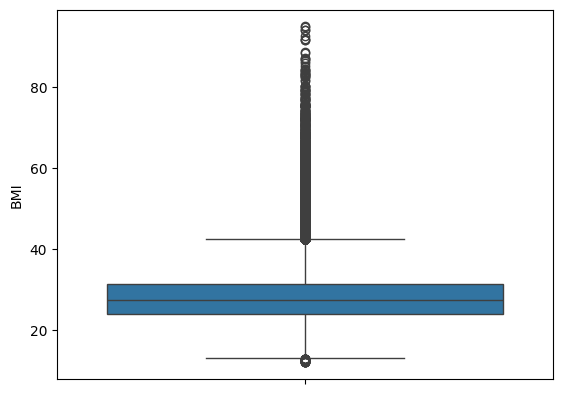

In [1472]:
sns.boxplot(df_heart["BMI"])

In [1473]:
# BMI 이상치 제거 전 범주형 데이터 분포도
df_heart.describe(include='object').loc['freq',:]/df_heart.describe(include='object').loc['count',:]

HeartDisease        0.914405
Smoking             0.587523
AlcoholDrinking     0.931903
Stroke               0.96226
DiffWalking          0.86113
Sex                 0.524727
AgeCategory          0.10679
Race                0.766779
Diabetic            0.843206
PhysicalActivity    0.775362
GenHealth           0.356034
Asthma              0.865939
KidneyDisease       0.963167
SkinCancer          0.906756
dtype: object

In [1474]:
# BMI 이상치 제거 후 범주형 데이터 분포도
df_heart.query("BMI<=60").describe(include='object').loc['freq',:]/df_heart.query("BMI<=60").describe(include='object').loc['count',:]

HeartDisease        0.914451
Smoking             0.587517
AlcoholDrinking     0.931895
Stroke              0.962287
DiffWalking         0.861743
Sex                 0.524539
AgeCategory         0.106867
Race                0.767108
Diabetic            0.843522
PhysicalActivity    0.775777
GenHealth           0.356408
Asthma              0.866212
KidneyDisease       0.963245
SkinCancer          0.906665
dtype: object

In [1475]:
df_heart = df_heart.query("BMI<=60")
df_heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319303.000000,319303.000000,319303.000000,319303.000000
mean,28.265504,3.361741,3.892134,7.097534
std,6.168596,7.938239,7.947626,1.434652
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.320000,0.000000,0.000000,7.000000
75%,31.380000,2.000000,3.000000,8.000000
max,59.970000,30.000000,30.000000,24.000000


#### Mental Health

In [1476]:
df_heart["MentalHealth"].value_counts()

MentalHealth
0.0     205165
30.0     17294
2.0      16469
5.0      14127
10.0     10491
3.0      10449
15.0      9872
1.0       9278
7.0       5524
20.0      5417
4.0       5371
14.0      2042
25.0      1952
6.0       1505
8.0       1090
12.0       755
28.0       514
21.0       351
29.0       315
18.0       210
9.0        202
16.0       152
17.0       128
27.0       125
13.0       110
22.0        98
11.0        82
23.0        68
24.0        67
26.0        59
19.0        21
Name: count, dtype: int64

#### Physical Health

In [1477]:
df_heart["PhysicalHealth"].value_counts()

PhysicalHealth
0.0     226372
30.0     19402
2.0      14860
1.0      10479
3.0       8600
5.0       7585
10.0      5443
15.0      4991
7.0       4616
4.0       4456
20.0      3200
14.0      2888
6.0       1269
25.0      1157
8.0        924
21.0       622
12.0       602
28.0       443
29.0       203
9.0        179
18.0       167
16.0       135
27.0       124
17.0       110
13.0        90
22.0        88
11.0        85
24.0        66
26.0        66
23.0        46
19.0        35
Name: count, dtype: int64

#### Sleep Time

In [1478]:
df_heart["SleepTime"].value_counts()

SleepTime
7.0     97652
8.0     97492
6.0     66593
5.0     19130
9.0     16019
10.0     7785
4.0      7717
12.0     2195
3.0      1980
2.0       784
1.0       550
11.0      415
14.0      242
16.0      236
15.0      188
18.0       99
13.0       95
20.0       63
24.0       30
17.0       21
22.0        9
19.0        3
23.0        3
21.0        2
Name: count, dtype: int64

In [1479]:
df_heart

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


### AgeCategory int로 변환

In [1480]:
df_heart["AgeCategory"].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [1481]:
df_heart.loc[:,'AgeCategory_int']=df_heart['AgeCategory'].str[:1]+"0"
df_heart.loc[:,'AgeCategory_int']=df_heart['AgeCategory_int'].astype("int")
df_heart.loc[:,'AgeCategory_int']=df_heart['AgeCategory_int'].astype("object")
df_heart["AgeCategory_int"].unique()

/tmp/ipykernel_82/3214754107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heart.loc[:,'AgeCategory_int']=df_heart['AgeCategory'].str[:1]+"0"


array([50, 80, 60, 70, 40, 10, 30, 20], dtype=object)

### Sex -> 1,0으로 변환

In [1482]:
df_heart["Sex"].unique()

array(['Female', 'Male'], dtype=object)

In [1483]:
    df_heart.loc[df_heart.loc[df_heart['Sex']=='Male'].index,"Sex"]=0
    df_heart.loc[df_heart.loc[df_heart['Sex']=='Female'].index,'Sex']=1
df_heart["Sex"].unique()

array([1, 0], dtype=object)

### Race Dtype 변경

In [1484]:
df_heart["Race"].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [1485]:
df_heart.loc[df_heart.loc[df_heart["Race"]=='White'].index,"Race"]=0
df_heart.loc[df_heart.loc[df_heart["Race"]=='Black'].index,"Race"]=1
df_heart.loc[df_heart.loc[df_heart["Race"]=='Asian'].index,"Race"]=2
df_heart.loc[df_heart.loc[df_heart["Race"]=='American Indian/Alaskan Native'].index,"Race"]=3
df_heart.loc[df_heart.loc[df_heart["Race"]=='Other'].index,"Race"]=4
df_heart.loc[df_heart.loc[df_heart["Race"]=='Hispanic'].index,"Race"]=5
df_heart["Race"].unique()

array([0, 1, 2, 3, 4, 5], dtype=object)

### GenHealth Dtype 변경

In [1486]:
df_heart["GenHealth"].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [1487]:
df_heart.loc[df_heart.loc[df_heart["GenHealth"]=='Poor'].index,"GenHealth"]=0
df_heart.loc[df_heart.loc[df_heart["GenHealth"]=='Fair'].index,"GenHealth"]=1
df_heart.loc[df_heart.loc[df_heart["GenHealth"]=='Good'].index,"GenHealth"]=2
df_heart.loc[df_heart.loc[df_heart["GenHealth"]=='Very good'].index,"GenHealth"]=3
df_heart.loc[df_heart.loc[df_heart["GenHealth"]=='Excellent'].index,"GenHealth"]=4
df_heart["GenHealth"].unique()

array([3, 1, 2, 0, 4], dtype=object)

### Diabetic Dtype 변경

In [1488]:
df_heart["Diabetic"].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [1489]:
df_heart.loc[df_heart.loc[df_heart["Diabetic"]=="No"].index,"Diabetic"]=0
df_heart.loc[df_heart.loc[df_heart["Diabetic"]=='No, borderline diabetes'].index,"Diabetic"]=1
df_heart.loc[df_heart.loc[df_heart["Diabetic"]=="Yes"].index,"Diabetic"]=2
df_heart.loc[df_heart.loc[df_heart["Diabetic"]=='Yes (during pregnancy)'].index,"Diabetic"]=3
df_heart["Diabetic"].unique()

array([2, 0, 1, 3], dtype=object)

### Yes,No -> 1,0으로 변환

In [ ]:
for i in list(df_heart.columns):
    df_heart.loc[df_heart.loc[df_heart[i]=='No'].index,i]=0
    df_heart.loc[df_heart.loc[df_heart[i]=='Yes'].index,i]=1
df_heart

## 심장병 있는 사람과 없는 사람의 다른 항목 분포도 비교

In [ ]:
df_heart_disease.describe(include="object").loc["top",:],df_heart_good.describe(include="object").loc["top",:]

In [ ]:
df_heart_disease.describe(include="object").loc["freq",:]/df_heart_disease.describe(include="object").loc["count",:],df_heart_good.describe(include="object").loc["freq",:]/df_heart_good.describe(include="object").loc["count",:]

## 군집화
* 범주형 데이터끼리도 해보고, 수치형 데이터끼리도 해보고, 섞어서도 해봤지만, 이상적인 분류가 나오지 않아 실패

In [ ]:
pip install kmodes

In [ ]:
# 수치형 군집화
from sklearn.cluster import KMeans
BMI_model = KMeans(n_clusters=3)
Sleep_model = KMeans(n_clusters=3)

# 범주형 군집화
# from kmodes.kmodes import KModes
# model = KModes(n_clusters=4)

# # 수치형 + 범주형 군집화
# from sklearn.cluster import KMeans
# model = KMeans(n_clusters=4, init='k-means++')
# from kmodes.kprototypes import KPrototypes
# model = KPrototypes(n_clusters=3, init='Cao')


In [ ]:
df_heart.query("HeartDisease==1").describe(include="all")

In [1329]:
df_heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27316 entries, 5 to 319790
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      27316 non-null  object 
 1   BMI               27316 non-null  float64
 2   Smoking           27316 non-null  object 
 3   AlcoholDrinking   27316 non-null  object 
 4   Stroke            27316 non-null  object 
 5   PhysicalHealth    27316 non-null  float64
 6   MentalHealth      27316 non-null  float64
 7   DiffWalking       27316 non-null  object 
 8   Sex               27316 non-null  object 
 9   AgeCategory       27316 non-null  object 
 10  Race              27316 non-null  object 
 11  Diabetic          27316 non-null  object 
 12  PhysicalActivity  27316 non-null  object 
 13  GenHealth         27316 non-null  object 
 14  SleepTime         27316 non-null  float64
 15  Asthma            27316 non-null  object 
 16  KidneyDisease     27316 non-null  object 
 1

In [1330]:
BMI_model.fit(df_heart_disease[["BMI"]])
Sleep_model.fit(df_heart_disease[["SleepTime"]])

# model.fit(df_heart_disease[["BMI", "DiffWalking"]], categorical=[1])

KMeans(n_clusters=3)

In [1331]:
n_cluster_list = [2,3,4,5,6]

BMI_result_list =[]
for n_cluster in n_cluster_list:
  n_model = KMeans(n_clusters=n_cluster)
  n_model.fit(df_heart_disease[["BMI"]])
  print(n_model.inertia_)
  BMI_result_list.append(n_model.inertia_)
  pass
     


420391.5295799015
223321.34846062108
135453.882116332
91578.07868260061
66126.7305063344


In [1332]:
n_cluster_list = [2,3,4,5,6]

Sleep_result_list =[]
for n_cluster in n_cluster_list:
  n_model = KMeans(n_clusters=n_cluster)
  n_model.fit(df_heart_disease[["SleepTime"]])
  print(n_model.inertia_)
  Sleep_result_list.append(n_model.inertia_)
  pass
     


51861.86173453517
30243.637597797297
18314.471359389794
10904.987233309777
7417.274232537189


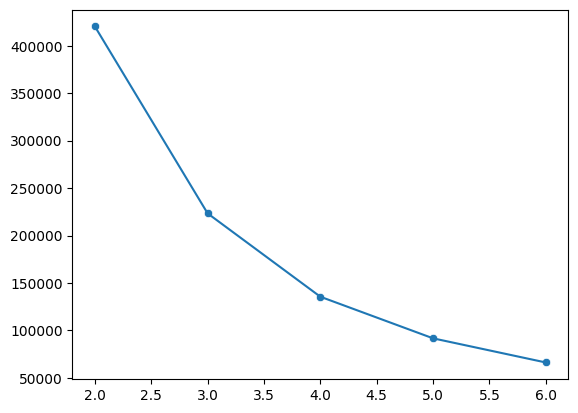

In [1333]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=n_cluster_list,y=BMI_result_list)
sns.lineplot(x=n_cluster_list,y=BMI_result_list)
plt.show() 

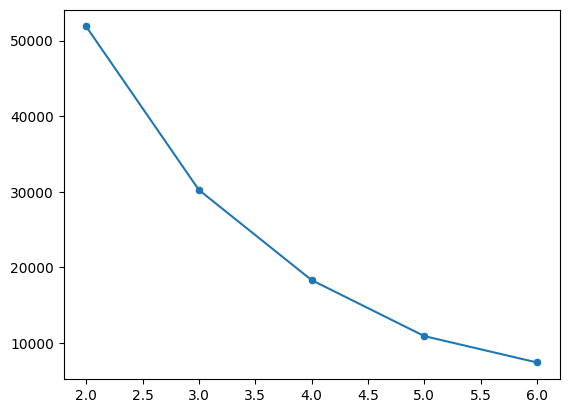

In [1334]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=n_cluster_list,y=Sleep_result_list)
sns.lineplot(x=n_cluster_list,y=Sleep_result_list)
plt.show() 

In [1335]:
BMI_cluster_list = BMI_model.predict(df_heart_disease[["BMI"]])
Sleep_cluster_list = Sleep_model.predict(df_heart_disease[["SleepTime"]])
# df_heart.loc['cluster'] = cluster_list
df_heart_disease.loc[:,'BMI_cluster'] = BMI_cluster_list
df_heart_disease.loc[:,'Sleep_cluster'] = Sleep_cluster_list
df_heart_disease["Sleep_cluster"].value_counts()
# cluster_list

/tmp/ipykernel_82/486380777.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heart_disease.loc[:,'BMI_cluster'] = BMI_cluster_list
/tmp/ipykernel_82/486380777.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heart_disease.loc[:,'Sleep_cluster'] = Sleep_cluster_list


Sleep_cluster
1    11858
0    11728
2     3730
Name: count, dtype: int64

In [1336]:
df_heart_disease.query('Sleep_cluster==0')[["BMI","SleepTime"]].describe(include="all")

,BMI,SleepTime
count,11728.000000,11728.000000
mean,29.401642,6.538967
std,6.240490,0.498501
min,12.210000,6.000000
25%,25.100000,6.000000
50%,28.460000,7.000000
75%,32.590000,7.000000
max,59.520000,7.000000


In [1337]:
df_heart_disease.query('Sleep_cluster==1')[["BMI","SleepTime"]].describe(include="all")

,BMI,SleepTime
count,11858.000000,11858.000000
mean,28.998171,8.608956
std,6.213028,1.334554
min,12.400000,8.000000
25%,24.810000,8.000000
50%,28.060000,8.000000
75%,32.260000,9.000000
max,59.970000,24.000000


In [1338]:
df_heart_disease.query('Sleep_cluster==2')[["BMI","SleepTime"]].describe(include="all")

,BMI,SleepTime
count,3730.000000,3730.000000
mean,30.119547,4.334048
std,7.061564,0.896909
min,12.840000,1.000000
25%,25.185000,4.000000
50%,29.210000,5.000000
75%,34.010000,5.000000
max,59.070000,5.000000


## 임의로 분류
- BMI는 저체중(X < 18.5), 정상+과체중(18.5<= X < 30), 비만(30 <= X < 40), 고도비만(X >= 40)으로 나눔
- 수면 시간은 수면 부족(X < 6), 정상 수면(6 <= X < 9), 수면 과다(X > 9)로 나눔
- 60대 중 BMI와 수면시간이 정상일 경우 심장병에 걸릴 확률 : 13%
- 60대 중 BMI가 비정상일 경우 심장병에 걸릴 확률 : 14%(1% 증가)
- 60대 중 수면시간이 비정상일 경우 심장병에 걸릴 확률 20% (7% 증가)
- 60대 중 BMI나 수면시간이 비정상일 경우 심장병에 걸릴 확률 : 18%(5% 증가)
- 60대 중 BMI와 수면시간이 비정상일 경우 심장병에 걸릴 확률 : 23% (10% 증가)

In [1399]:
df_heart.loc[df_heart.loc[df_heart["BMI"] < 18.5].index,"BMI_cluster"]=0
df_heart.loc[df_heart.loc[(df_heart["BMI"] >= 18.5)&(df_heart["BMI"] < 30)].index,"BMI_cluster"]=1
df_heart.loc[df_heart.loc[(df_heart["BMI"] >= 30)&(df_heart["BMI"] < 40)].index,"BMI_cluster"]=2
df_heart.loc[df_heart.loc[df_heart["BMI"] >= 40].index,"BMI_cluster"]=3
df_heart["BMI_cluster"].value_counts()

BMI_cluster
1.0    211843
2.0     86457
3.0     15893
0.0      5110
Name: count, dtype: int64

In [1400]:
df_heart.loc[df_heart.loc[df_heart["SleepTime"] < 6].index,"Sleep_cluster"]=0
df_heart.loc[df_heart.loc[(df_heart["SleepTime"] >= 6)&(df_heart["SleepTime"] < 9)].index,"Sleep_cluster"]=1
df_heart.loc[df_heart.loc[df_heart["SleepTime"] >= 9].index,"Sleep_cluster"]=2
df_heart["Sleep_cluster"].value_counts()

Sleep_cluster
1.0    261737
0.0     30161
2.0     27405
Name: count, dtype: int64

In [1401]:
df_heart_disease = df_heart.query("HeartDisease==1")
df_heart_good = df_heart.query("HeartDisease==0")

In [1404]:
df_heart_disease["AgeCategory_int"].value_counts()/df_heart["AgeCategory_int"].value_counts()

AgeCategory_int
10    0.006084
20    0.007795
30    0.013239
40    0.028448
50    0.064821
60    0.109478
70    0.169237
80    0.225637
Name: count, dtype: float64

In [1458]:
# 60대 대상 수면시간과 BMI가 정상일 때 심장별 걸릴 확률
age_conditions = "AgeCategory_int >= 60"
BMI_conditions = "BMI_cluster == 1"
Sleep_conditions = "Sleep_cluster == 1"
conditions = f"{BMI_conditions} and {Sleep_conditions}"
condition_total= f"{age_conditions} and {conditions}"
round(len(df_heart_disease.query(condition_total))/len(df_heart.query(condition_total)),2)

0.13

In [1459]:
# 60대 대상 수면시간이나 BMI가 비정상일 때 심장별 걸릴 확률
age_conditions = "AgeCategory_int >= 60"
BMI_conditions = "BMI_cluster != 1"
Sleep_conditions = "Sleep_cluster != 1"
conditions = f"{BMI_conditions} or {Sleep_conditions}"
condition_total= f"{age_conditions} and {conditions}"
round(len(df_heart_disease.query(condition_total))/len(df_heart.query(condition_total)),2)

0.14

In [1460]:
# 60대 대상 수면시간이 비정상일 때 심장별 걸릴 확률
age_conditions = "AgeCategory_int >= 60"
Sleep_conditions = "Sleep_cluster != 1"
conditions = f"{Sleep_conditions}"
condition_total= f"{age_conditions} and {conditions}"
round(len(df_heart_disease.query(condition_total))/len(df_heart.query(condition_total)),2)

0.2

In [1461]:
# 60대 대상 BMI가 비정상일 때 심장별 걸릴 확률
age_conditions = "AgeCategory_int >= 60"
BMI_conditions = "BMI_cluster != 1"
conditions = f"{BMI_conditions}"
condition_total= f"{age_conditions} and {conditions}"
round(len(df_heart_disease.query(condition_total))/len(df_heart.query(condition_total)),2)

0.18

In [1462]:
# 60대 대상 수면시간과 BMI가 비정상일 때 심장별 걸릴 확률
age_conditions = "AgeCategory_int >= 60"
BMI_conditions = "BMI_cluster != 1"
Sleep_conditions = "Sleep_cluster != 1"
conditions = f"{BMI_conditions} and {Sleep_conditions}"
condition_total= f"{age_conditions} and {conditions}"
round(len(df_heart_disease.query(condition_total))/len(df_heart.query(condition_total)),2)

0.23

## 결론
- BMI와 수면시간이 비정상일 경우 60대 이후에 심장병 유병률이 최대 10%까지 증가
- 그렇기 때문에 젊은 나이에서부터 BMI와 수면시간의 관리가 필요함
- 특히, 수면시간은 BMI보다 많은 영향을 미치는 것으로 보임
- 수면시간과 BMI간의 연관성은 보이지 않았기 때문에 분류를 각자 나눠서 타겟팅 